# MODELOS DE MACHINE LEARNING


**Autor: Jenny Marisol Tenisaca Moposita**

**Importar librerias**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Conjunto con Datos balanceados método ROSE - OVER
**Importar el data de entrenamiento (balanceados) y data test**

Cargar conjuntos de entrenamiento balanceados (4 métodos) y conjunto de test. (los conjuntos de entrenamiento y test fueron dividimos en 80% y 20%)  

In [2]:
#data entrenamiento balanceado con ROSE-OVER
data_train_bal = pd.read_csv('Data_train_Rose_Over_ c.csv', encoding='latin-1',sep=';')
# 80% de la data completa 

In [3]:
#data test
data_test = pd.read_csv('Data_test.csv',sep=';')
# 20% de la data completa 

In [5]:
X_train=data_train_bal.iloc[:,1:23].values
y_train=data_train_bal.iloc[:,0].values
X_test=data_test.iloc[:,1:23].values
y_test=data_test.iloc[:,0].values

## Ajustar el clasificador Random Forest en el Conjunto de Entrenamiento

In [11]:
#Validación cruzada (datos)
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
kf =KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(RandomForestClassifier(n_estimators = 100, n_jobs=2, criterion = "entropy", random_state = 123), X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.4f}".format(score.mean())}')

Scores for each fold are: [0.9958159  0.99565358 0.99578333 0.99565358 0.99607525]
Average score: 0.9958


In [12]:
#Validación cruzada (gráfico y datos)
def graficar_Accu_scores(estimator, X_train, y_train,X_test,y_test,nparts=5,jobs=None):
    kf = KFold(n_splits=nparts,shuffle=True, random_state=42)
    fig,axes = plt.subplots(figsize=(7, 3))
    axes.set_title("Acc/Nro. Fold")
    axes.set_xlabel("Nro. Fold")
    axes.set_ylabel("Acc")    
    train_scores = cross_val_score(estimator, X_train, y_train, cv = kf, n_jobs=jobs,scoring="accuracy")
    test_scores = cross_val_score(estimator, X_test,y_test, cv = kf, n_jobs=jobs,scoring="accuracy")        
    train_sizes = range(1,nparts+1,1)    
    axes.grid()    
    axes.plot(train_sizes, train_scores, 'o-', color="r",label="Datos Entrenamiento")
    axes.plot(train_sizes, test_scores, 'o-', color="g",label="Validacion Cruzada")
    axes.legend(loc="best")
    return train_scores

array([0.9958159 , 0.99565358, 0.99578333, 0.99565358, 0.99607525])

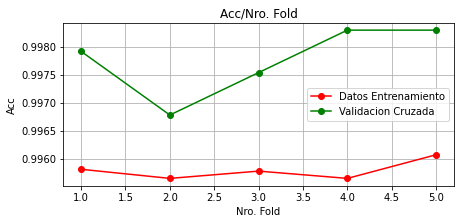

In [13]:
#Validación cruzada (gráfico y datos)
graficar_Accu_scores(clas_rndforest,X_train,y_train,X_test,y_test,nparts=5,jobs=2)

In [6]:
from sklearn.ensemble import RandomForestClassifier
clas_rndforest = RandomForestClassifier(n_estimators = 100, n_jobs=2, criterion = "entropy", random_state = 123)
clas_rndforest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_jobs=2, random_state=123)

### Predicción resultados

In [8]:
y_pred  = clas_rndforest.predict(X_test)

In [9]:
##matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[19246,     3],
       [   52,  7123]], dtype=int64)

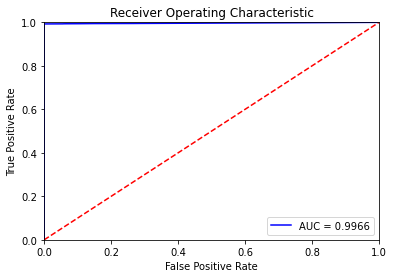

In [14]:
#Curvas ROC
import sklearn.metrics as metrics
# calcular fpr y tpr para todos los thresholds de la clasificación
probs = clas_rndforest.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Importancia de las variables del modelo

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
#Para obtener la importancia de cada variable se inicializa el  ExtraTreesClassifier
X_train=data_train_bal.iloc[:,1:23]
y_train=data_train_bal.iloc[:,0]

model_RF_imp = ExtraTreesClassifier(n_estimators = 100, n_jobs=2, criterion = "gini", random_state = 123)

#Ajustar el modelo
model_RF_imp.fit(X_train, y_train)

#Imprimir la importancia de cada variable
print(clas_rndforest.feature_importances_)

#Imprimir junto a los nombres de las variables 
list(clas_rndforest.feature_importances_)
import pandas as pd
importancia_predictores = pd.DataFrame(
                            {'variable': X_train.columns,
                             'importancia': clas_rndforest.feature_importances_}
                            )
print("Importancia de las variables del modelo")
print("-------------------------------------------")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)


[0.57036956 0.21868609 0.00975929 0.00491006 0.0049352  0.00532468
 0.00458165 0.0101714  0.00706396 0.00668208 0.00476163 0.00280003
 0.00490815 0.00972466 0.02339658 0.06877393 0.02034547 0.00392972
 0.00230475 0.00434321 0.00579757 0.00643033]
Importancia de las variables del modelo
-------------------------------------------
-------------------------------------------


,variable,importancia
0,Promedio_tiempo_reincidencia,0.570370
1,Prom_Tiempo_sentencia_f,0.218686
15,Sit_Actual_f_No_ingreso_CPL,0.068774
14,Sit_Actual_f_Libre,0.023397
16,Sit_Actual_f_Presente,0.020345
7,Ultimo_Delito_f_Delito_CP,0.010171
2,sexo_f,0.009759
13,Trabaja_f1,0.009725
8,Ultimo_Delito_f_Delito_CV,0.007064
9,Ultimo_Delito_f_Delito_Drogas,0.006682


## Ajustar el clasificador SVM en el Conjunto de Entrenamiento

In [18]:
#validación cruzada (datos)
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
kf =KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(SVC(kernel='rbf',random_state=123), X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.4f}".format(score.mean())}')

Scores for each fold are: [0.97985794 0.98089523 0.97992215 0.97963023 0.98060331]
Average score: 0.9802


array([0.97985794, 0.98089523, 0.97992215, 0.97963023, 0.98060331])

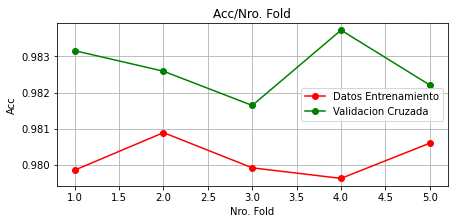

In [19]:
#Validación cruzada (gráfico y datos)
graficar_Accu_scores(class_svm,X_train,y_train,X_test,y_test,nparts=5,jobs=2)

In [15]:
# Fitting SVM to the Training set using Kernel as rbf.
from sklearn.svm import SVC
class_svm = SVC(kernel='rbf',probability=True,random_state=123)
class_svm.fit(X_train, y_train)

SVC(probability=True, random_state=123)

In [16]:
# Predecir los resultados
y_pred_svm = class_svm.predict(X_test)

In [17]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm # display

array([[19249,     0],
       [  251,  6924]], dtype=int64)

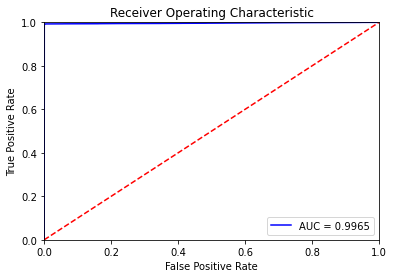

In [20]:
#Curvas ROC
import sklearn.metrics as metrics
# calcular fpr y tpr para todos los thresholds de la clasificación
probs = class_svm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Ajustar el clasificador NAIVE BAYES en el Conjunto de Entrenamiento

In [24]:
#validación cruzada (datos)
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
kf =KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(GaussianNB(), X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.4f}".format(score.mean())}')

Scores for each fold are: [0.99503746 0.99484269 0.99510217 0.99523192 0.99519948]
Average score: 0.9951


array([0.99503746, 0.99484269, 0.99510217, 0.99523192, 0.99519948])

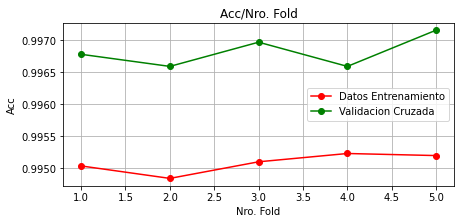

In [25]:
#Validación cruzada
graficar_Accu_scores(class_nb,X_train,y_train,X_test,y_test,nparts=5,jobs=2)

In [21]:
from sklearn.naive_bayes import GaussianNB
class_nb = GaussianNB()
class_nb.fit(X_train, y_train)

GaussianNB()

In [22]:
# Predecir los resultados
y_pred_nb  = class_nb.predict(X_test)

In [23]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_nb # display

array([[  130, 19119],
       [    0,  7175]], dtype=int64)

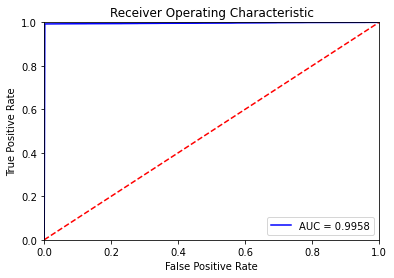

In [26]:
#Curvas ROC
import sklearn.metrics as metrics
# calcular fpr y tpr para todos los thresholds de la clasificación
probs = class_nb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc1 = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Ajustar el clasificador REDES NEURONALES en el Conjunto de Entrenamiento

In [33]:
#validación cruzada (datos)
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold, cross_val_score

def built_class_RN():
    #Inicializar la RNA
    class_RN = Sequential()
    #Añadir las capas de entrada y primera capa oculta
    class_RN.add(Dense(units = 12, kernel_initializer = "uniform", activation = "relu", input_dim = 23))
    #Añadir la segunda capa oculta
    class_RN.add(Dense(units = 10, kernel_initializer = "uniform",  activation = "relu"))
    #Añadir la capa de salida
    class_RN.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))
    #Compilar la RNA
    class_RN.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
    return class_RN

#Ajustar la RNA al Conjunto de Entrenamiento
class_RN = KerasClassifier(build_fn=built_class_RN, batch_size = 10, epochs = 100)
kf =KFold(n_splits=5, shuffle=True, random_state=42)
Accuracy = cross_val_score(class_RN, X_train, y_train, cv= kf, n_jobs=-1)


C:\Users\jenny\AppData\Local\Temp/ipykernel_15164/2278733859.py:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  class_RN = KerasClassifier(build_fn=built_class_RN, batch_size = 10, epochs = 100)


In [34]:
print(f'Scores for each fold are: {Accuracy}')
print(f'Average score: {"{:.4f}".format(Accuracy.mean())}')

Scores for each fold are: [0.9903993  0.9899773  0.99108011 0.9894259  0.98929614]
Average score: 0.9900


In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [6]:
#Inicializar la RNA
class_RN = Sequential()
#Añadir las capas de entrada y primera capa oculta
class_RN.add(Dense(units = 12, kernel_initializer = "uniform",  
                     activation = "relu", input_dim = 23))
#Añadir la segunda capa oculta
class_RN.add(Dense(units = 10, kernel_initializer = "uniform",  activation = "relu"))
#Añadir la capa de salida
class_RN.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))
#Compilar la RNA
class_RN.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
#Ajustar la RNA al Conjunto de Entrenamiento
class_RN.fit(X_train, y_train,  batch_size = 10, epochs = 100)

Epoch 1/100
15416/15416 [==============================] - 20s 1ms/step - loss: 0.0906 - accuracy: 0.9755
Epoch 2/100
15416/15416 [==============================] - 19s 1ms/step - loss: 0.0674 - accuracy: 0.9833
Epoch 3/100
15416/15416 [==============================] - 20s 1ms/step - loss: 0.0652 - accuracy: 0.9841
Epoch 4/100
15416/15416 [==============================] - 21s 1ms/step - loss: 0.0639 - accuracy: 0.9845
Epoch 5/100
15416/15416 [==============================] - 19s 1ms/step - loss: 0.0627 - accuracy: 0.9848
Epoch 6/100
15416/15416 [==============================] - 20s 1ms/step - loss: 0.0624 - accuracy: 0.9848
Epoch 7/100
15416/15416 [==============================] - 25s 2ms/step - loss: 0.0609 - accuracy: 0.9854
Epoch 8/100
15416/15416 [==============================] - 23s 2ms/step - loss: 0.0598 - accuracy: 0.9855
Epoch 9/100
15416/15416 [==============================] - 20s 1ms/step - loss: 0.0594 - accuracy: 0.9857
Epoch 10/100
15416/15416 [====================

In [7]:
test_loss, test_acc = class_RN.evaluate(X_test,  y_test, verbose=2)
print('\nTest Accuracy:', test_acc)

826/826 - 1s - loss: 0.0259 - accuracy: 0.9956 - 832ms/epoch - 1ms/step

Test Accuracy: 0.9955722093582153


In [8]:
# Evaluar el modelo y calcular predicciones finales
# Predicción de los resultados con el Conjunto de Testing
y_pred_rn  = class_RN.predict(X_test)
y_pred_rn = (y_pred_rn>0.5)


In [9]:
#Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm_rn = confusion_matrix(y_test, y_pred_rn)
cm_rn

array([[19243,     6],
       [  111,  7064]], dtype=int64)

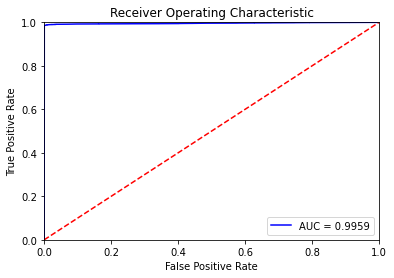

In [10]:
#Curva ROC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_pred_rn_curv = class_RN.predict(X_test).ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred_rn_curv)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(nn_fpr_keras, nn_tpr_keras, 'b', label = 'AUC = %0.4f' % auc_keras)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()